## Retrieve Frequency Counts for Users

In [1]:
import os, json
from os import path
import pandas as pd
import numpy as np
import glob
pd.set_option('display.max_columns', None)

#FJERN POLITIFACT 14548 - 1054731691875618829 ELLER KJØR MED ERRORS=SURROGATEESCAPE 
#GJENTA FOR REAL
fakeArticlesPD = pd.DataFrame()
realArticlesPD = pd.DataFrame()
fakeUsers = {}
realUsers = {}

for i in range(2):
    if i == 0:
        authenticity = 'fake'
    else:
        authenticity = 'real'
    rootdir = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/'+authenticity
    
    for subdir, dirs, articles in os.walk(rootdir):
        for article in dirs:
            #print(subdir)
            temp = pd.DataFrame()
            #path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact11773/tweets' 
            path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/' + authenticity + '/'+ article + '/tweets' 
            #print(path_to_json)
            json_pattern = os.path.join(path_to_json,'*.json')
            file_list = glob.glob(json_pattern)

            for file in file_list:
                #print(file)
                try:
                    data = pd.read_json(open(file, "r", encoding="utf8", errors="surrogateescape"), lines=True)
                    temp = temp.append(data, ignore_index = True)
                    data = pd.read_json(open(file, "r", encoding="utf8", errors="surrogateescape"), lines=True)
                    if authenticity == 'fake':
                        fakeArticlesPD = fakeArticlesPD.append(data, ignore_index = True)
                    else:
                        realArticlesPD = realArticlesPD.append(data, ignore_index = True)
                    break
                except ValueError:
                    print("ValueError")
        #print(temp["user"][0]['id'])
        #print(temp['retweets'][13][0]['user']['id'])


        #FINN UNIKE VERDIER UNDER USER I TEMP: 
            users = list() #LAG LISTE HELLER
            texts = list()
            if "user" in temp.keys():
                for dic in temp["user"]:
                    if dic['id'] not in users:
                        users.append(dic['id'])
        
            temp = pd.DataFrame()        
        #path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact11773/retweets' 
            path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/'+authenticity+'/'+article+'/retweets' 
            #print(path_to_json)
            json_pattern = os.path.join(path_to_json,'*.json')
            file_list = glob.glob(json_pattern)

            for file in file_list:
            #print(file)
                try:
                    data = pd.read_json(open(file, "r", encoding="utf8", errors="surrogateescape"), lines=True)
                    temp = temp.append(data, ignore_index = True)
                    if authenticity == 'fake':
                        fakeArticlesPD = fakeArticlesPD.append(data, ignore_index = True)
                    else:
                        realArticlesPD = realArticlesPD.append(data, ignore_index = True)
                    break
                except ValueError:
                    print("ValueError")
        #print(temp["user"][0]['id'])
        #print(temp['retweets'][13][0]['user']['id'])



        #FINN UNIKE VERDIER UNDER USER I TEMP: 
        #users = list() #LAG LISTE HELLER
            if "retweets" in temp.keys():
                for lst in temp["retweets"]:
                    if len(lst)>0:
                        #print(lst)
                        if lst[0]['user']['id'] not in users:
                            users.append(lst[0]['user']['id'])

            if i == 0:
            #Initialize dict
                for user in users:
                    if user not in fakeUsers.keys():
                        fakeUsers[user] = 0
            #increment usercounts
                for fakeUser in fakeUsers:
                    fakeUsers[fakeUser] = fakeUsers[fakeUser]+1
                #print(fakeUsers)
            elif i == 1:
                #Initialize dict
                for user in users:
                    if user not in realUsers.keys():
                        realUsers[user] = 0
                #increment usercounts
                for realUser in realUsers:
                    realUsers[realUser] = realUsers[realUser]+1
                #print(realUsers)
    #if authenticity == 'fake':
    #    realUsersPD['fake'] = 'true'
    #else:
    #    fakeUsersPD['fake'] = 'false'
    
#for articles..
#fakeArticles.append('politifact11773') #legg til alle articles for plot

C:\Users\henri\Anaconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


## Plot tweetcount per user and label real/fake

In [2]:
import matplotlib.pylab as plt

lists = sorted(fakeUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)

ax.plot(x, y, 'r', label='fake')

lists = sorted(realUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

ax.plot(x, y, 'g', label='real')

ax.set_xlabel('Users')
ax.set_ylabel('Tweet/Retweet Frequency')
ax.legend()
plt.title("User Frequencies", fontsize=17)
plt.show()

<Figure size 500x300 with 1 Axes>

## Histogram Plot for Users/Tweets with Labels

(1175221, 5971922, 8726812, 8953122, 11335322, 13337152, 14131630, 14338931, 14345062, 14378429, 15244807, 15359014, 15521063, 15755670, 15995652, 16094355, 16193250, 16477823, 16491845, 16521268, 17202571, 17309068, 17744351, 18378334, 18479878, 18553742, 18643437, 18856867, 19211550, 19592688, 20419354, 20741163, 20867106, 21032566, 21726566, 22420450, 22794878, 23452333, 24161006, 25648003, 26760483, 27656375, 28854023, 29010023, 29226383, 29315071, 30051241, 31288110, 32910422, 35849681, 35907241, 36932536, 37403994, 38851049, 39253975, 39818855, 40309288, 43107259, 44781669, 48267697, 49091628, 49814519, 49884490, 51085942, 51207313, 53946245, 54169562, 55220541, 56177108, 59296053, 65109514, 66576036, 70749151, 72166789, 73292019, 74780139, 76937426, 79871519, 81354135, 85085807, 91736511, 100513430, 104640168, 107773189, 108151209, 109161557, 111332093, 118218465, 122495401, 122853659, 124267704, 124859062, 129262130, 133018525, 135344744, 135517410, 137741758, 139545790, 141422

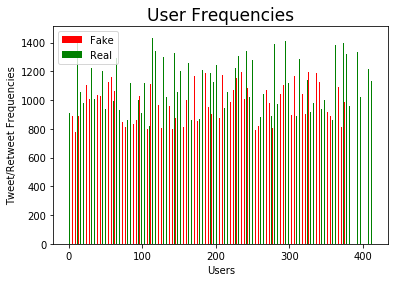

In [4]:
lists = sorted(fakeUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
print(x)
lists2 = sorted(realUsers.items()) # sorted by key, return a list of tuples

x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
ax = plt.subplot(111)
ax.bar(np.arange(len(x)), y, width=0.2, color='r', align='center')
ax.bar(np.arange(len(x2))-0.2, y2, width=0.2, color='g', align='center')
ax.legend(('Fake','Real'))
ax.set_xlabel('Users')
ax.set_ylabel('Tweet/Retweet Frequencies')
plt.title("User Frequencies", fontsize=17)
plt.show()

## Kernel Density Function (KDE) Histogram for Users/Tweets with Labels

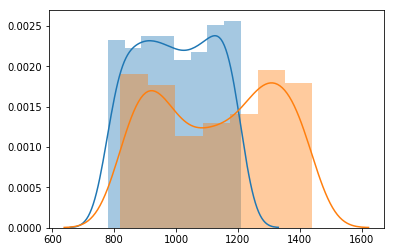

In [90]:
import seaborn as sns
import matplotlib.pylab as plt

lists = sorted(fakeUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

sns.distplot(y)

lists = sorted(realUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

sns.distplot(y)

## Ratio-Plot

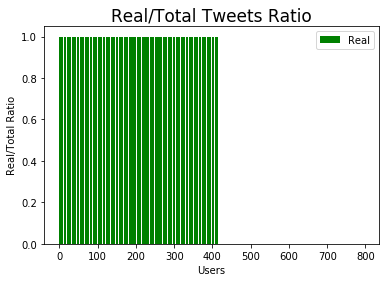

In [92]:
#Ratio-Plot
import matplotlib.pylab as plt

#merge dicts
def divide(dividends, divisors):
    ret = dict()
    for key, dividend in dividends.items():
        ret[key] = dividend/(divisors.get(key, 1)+dividend)
    for key, divisor in divisors.items():
        if key not in ret.keys():
            ret[key] = dividends.get(key, 1)/(divisor+dividends.get(key,1))
    return ret# sorted by key, return a list of tuples

d3 = {}
d3 = divide(realUsers,fakeUsers)
x, y = zip(*d3.items()) # unpack a list of pairs into two tuples
ax = plt.subplot(111)
ax.bar(np.arange(len(x)), y, color='g', align='center')
ax.legend(('Real','Fake'))
ax.set_xlabel('Users')
ax.set_ylabel('Real/Total Ratio')
plt.title("Real/Total Tweets Ratio", fontsize=17)
plt.show()

## Tweet Frequency Scatterplot

415
796
796
796


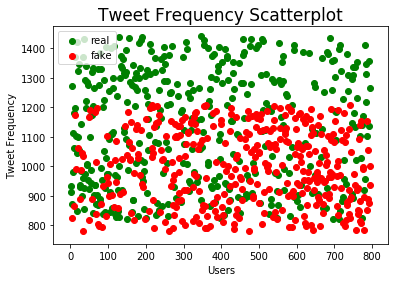

In [3]:
#Ratio-Plot
import matplotlib.pylab as plt
realUsersTotal = {}
fakeUsersTotal = {}
realUsersTotal = dict(realUsers)
fakeUsersTotal = dict(fakeUsers)
print(len(realUsersTotal.keys()))
for key in fakeUsers:
    if key not in realUsers.keys():
        realUsersTotal[key] = np.nan
for key in realUsers:
    if key not in fakeUsers.keys():
        fakeUsersTotal[key] = np.nan
print(len(realUsersTotal.keys()))

#plt.scatter(realUsersTotal.items(),fakeUsersTotal.items())

#plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
idx = []
for item in range(len(realUsersTotal.keys())):
    idx.append(item)
print(len(idx))
items = []
fakeItems=[]
for key in realUsersTotal.keys():
    items.append(realUsersTotal[key])
for key in fakeUsersTotal.keys():
    fakeItems.append(fakeUsersTotal[key])
    
keys = sorted(set(list(realUsersTotal.keys())+list(fakeUsersTotal.keys())))

#add values from set of real and fake to realUsersTotal if 77
d = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d[x] for x in realUsersTotal.keys()]
for i,key in enumerate(temp):
    realUsersTotal[key] = realUsersTotal.pop(list(d)[i])
    
d2 = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d2[x] for x in fakeUsersTotal.keys()]
for i,key in enumerate(temp):
    fakeUsersTotal[key] = fakeUsersTotal.pop(list(d2)[i])
    
print(len(fakeUsersTotal))
ax1.scatter(realUsersTotal.keys(), items, c='g', label='real')
ax1.scatter(fakeUsersTotal.keys(), fakeItems, c='r', label='fake')
ax1.set_xlabel('Users')
ax1.set_ylabel('Tweet Frequency')
plt.title("Tweet Frequency Scatterplot", fontsize=17)
plt.legend();
plt.show()

In [6]:
for key in realUsers.keys():
    if key in fakeUsers.keys():
        print(key)

14345062
225265639
491773328
959856286061006848


## Tweet Frequency t-SNE Plot

In [15]:
import matplotlib.pylab as plt
realUsersTotal = {}
fakeUsersTotal = {}
realUsersTotal = dict(realUsers)
fakeUsersTotal = dict(fakeUsers)
print(len(realUsersTotal.keys()))
for key in fakeUsers:
    if key not in realUsers.keys():
        realUsersTotal[key] = 0
for key in realUsers:
    if key not in fakeUsers.keys():
        fakeUsersTotal[key] = 0
print(len(realUsersTotal.keys()))

#plt.scatter(realUsersTotal.items(),fakeUsersTotal.items())

#plt.show()

idx = []
for item in range(len(realUsersTotal.keys())):
    idx.append(item)
print(len(idx))
items = []
fakeItems=[]
for key in realUsersTotal.keys():
    items.append(realUsersTotal[key])
for key in fakeUsersTotal.keys():
    fakeItems.append(fakeUsersTotal[key])
    
keys = sorted(set(list(realUsersTotal.keys())+list(fakeUsersTotal.keys())))

#add values from set of real and fake to realUsersTotal if 77
d = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d[x] for x in realUsersTotal.keys()]
for i,key in enumerate(temp):
    realUsersTotal[key] = realUsersTotal.pop(list(d)[i])
    
d2 = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d2[x] for x in fakeUsersTotal.keys()]
for i,key in enumerate(temp):
    fakeUsersTotal[key] = fakeUsersTotal.pop(list(d2)[i])
    
print(len(fakeUsersTotal))

combinedReal = np.vstack((list(realUsersTotal.keys()), items)).T
combinedFake = np.vstack((list(fakeUsersTotal.keys()), fakeItems)).T


RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points = tsne.fit_transform(combinedReal[:10000])


from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points2 = tsne.fit_transform(combinedFake[:10000])

415
796
796
796


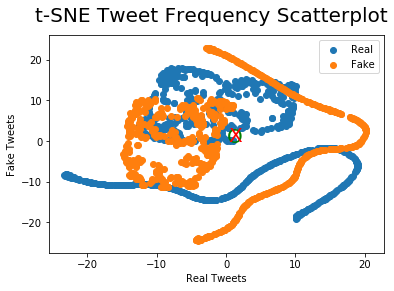

In [14]:
def plot_tsne_2d(x, y, x2, y2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x, y)
    ax.text(np.mean(x),np.mean(y), 'O', size=20, color='g')
    ax.scatter(x2, y2)
    ax.text(np.mean(x2),np.mean(y2), 'X', size=20, color='r')
    ax.legend(('Real','Fake'))
    ax.set_xlabel('Real Tweets')
    ax.set_ylabel('Fake Tweets')
    fig.suptitle('t-SNE Tweet Frequency Scatterplot', fontsize=20)
plot_tsne_2d(
    x = points[:10000, 0],
    y = points[:10000, 1],
    x2 = points2[:10000, 0],
    y2 = points2[:10000, 1])

## CDF Plot

Text(0, 0.5, 'Probability')

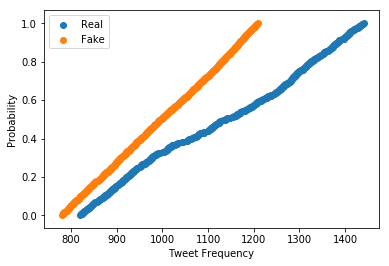

In [17]:
#CDF
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

realTemp=list(realUsers.values())
ax = plt.subplot(111)
x = np.sort(realTemp)
n = x.size
y = np.arange(1, n+1) / n

ax.scatter(x=x, y=y);

fakeTemp=list(fakeUsers.values())
x = np.sort(fakeTemp)
n = x.size
y = np.arange(1, n+1) / n

ax.scatter(x=x, y=y);

ax.legend(('Real','Fake'))
ax.set_xlabel('Tweet Frequency')
ax.set_ylabel('Probability')

## TF-IDF

In [4]:
exploded = fakeArticlesPD.user.apply(pd.Series)
exploded.columns = [str(col) + '_user' for col in exploded.columns]
fakeArticlesPD = pd.concat([fakeArticlesPD.drop(columns='user'), exploded], axis=1)

exploded = realArticlesPD.user.apply(pd.Series)
exploded.columns = [str(col) + '_user' for col in exploded.columns]
realArticlesPD = pd.concat([realArticlesPD.drop(columns='user'), exploded], axis=1)

### TF

In [193]:
terms = {}
fakeArticlesTermFreq = {}
realArticlesTermFreq = {}

for user in fakeUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    if user not in fakeArticlesTermFreq.keys():
            fakeArticlesTermFreq[user] = {}
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(fakeArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
        uniqueWords = []
        for word in wordsList:
            #print(word)
            counts = {}
            if word not in counts.keys():
                uniqueWords.append(word)
                counts[word] = 0
            counts[word] += 1
        for word in uniqueWords:
            if word not in fakeArticlesTermFreq[user].keys():
                fakeArticlesTermFreq[user][word] = 0
            for n_word in counts:
            #print(counts[n_word])
                fakeArticlesTermFreq[user][word]=counts[n_word]/len(wordsList)
    #print(fakeArticlesTermFreq[user])
    #print(fakeUsersTermFreq[user])
    

for user in realUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(realArticlesPD.loc[realArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    if user not in realArticlesTermFreq.keys():
            realArticlesTermFreq[user] = {}
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(realArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
        uniqueWords = []
        for word in wordsList:
            #print(word)
            counts = {}
            if word not in counts.keys():
                uniqueWords.append(word)
                counts[word] = 0
            counts[word] += 1
        for word in uniqueWords:
            if word not in realArticlesTermFreq[user].keys():
                realArticlesTermFreq[user][word] = 0
            for n_word in counts:
            #print(counts[n_word])
                realArticlesTermFreq[user][word]=counts[n_word]/len(wordsList)
    print(realArticlesTermFreq[user])

{'0': 0.09090909090909091, 'The': 0.09090909090909091, 'Foxxhole': 0.09090909090909091, 'Best': 0.09090909090909091, 'Guest': 0.09090909090909091, 'Nominees': 0.09090909090909091, '11.27.2': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'2': 0.08333333333333333, '#tbrs': 0.08333333333333333, '#tcot': 0.08333333333333333, '#sgp': 0.08333333333333333, '"Donald': 0.08333333333333333, 'Trump': 0.08333333333333333, 'on': 0.08333333333333333, 'Miss': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'4': 0.09090909090909091, '@TheDemocrats': 0.09090909090909091, 'sure': 0.09090909090909091, 'have': 0.09090909090909091, 'a': 0.09090909090909091, 'defeatist': 0.09090909090909091, 'ment': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.0909

{'114': 0.09090909090909091, '@NBCNews': 0.09090909090909091, '@MeetThePress': 0.09090909090909091, 'Which': 0.09090909090909091, 'Trump': 0.09090909090909091, 'will': 0.09090909090909091, '': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'116': 0.07692307692307693, 'Michelle': 0.07692307692307693, 'Obama': 0.07692307692307693, 'Says': 0.07692307692307693, 'That': 0.07692307692307693, 'She': 0.07692307692307693, 'Is': 0.07692307692307693, 'The': 0.07692307692307693, 'Re': 0.07692307692307693, 'Name': 0.07692307692307693, 'text': 0.07692307692307693, 'dtype': 0.07692307692307693, 'object': 0.07692307692307693}
{'120': 0.07692307692307693, 'I': 0.07692307692307693, 'added': 0.07692307692307693, 'a': 0.07692307692307693, 'video': 0.07692307692307693, 'to': 0.07692307692307693, '@YouTube': 0.07692307692307693, 'playlist': 0.07692307692307693, 'Name': 0.07692307692307693, 'text': 0.076923076923076

{'210': 0.09090909090909091, 'Peoples': 0.09090909090909091, 'World': 0.09090909090909091, 'Florida': 0.09090909090909091, 'Professor': 0.09090909090909091, 'Robert': 0.09090909090909091, '': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'212': 0.09090909090909091, 'NYT': 0.09090909090909091, '(7/20/2016)': 0.09090909090909091, 'Donald': 0.09090909090909091, 'Trump': 0.09090909090909091, 'Sets': 0.09090909090909091, 'Condi': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'214': 0.08333333333333333, 'Reed': 0.08333333333333333, 'Smith': 0.08333333333333333, 'Health': 0.08333333333333333, 'Care': 0.08333333333333333, 'Reform': 0.08333333333333333, 'Review': 0.08333333333333333, '': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.0

{'290': 0.1, '@DavidShuster': 0.1, '@JoyAnnReid': 0.1, 'The': 0.1, 'president': 0.1, 'i': 0.1, 'Name': 0.1, 'text': 0.1, 'dtype': 0.1, 'object': 0.1}
{'292': 0.09090909090909091, 'From': 0.09090909090909091, 'the': 0.09090909090909091, 'National': 0.09090909090909091, 'Vital': 0.09090909090909091, 'Statistics': 0.09090909090909091, 'Repor': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'294': 0.08333333333333333, 'WATCH': 0.08333333333333333, 'LIVE': 0.08333333333333333, 'Tim': 0.08333333333333333, 'Kaine': 0.08333333333333333, 'and': 0.08333333333333333, 'Corey': 0.08333333333333333, 'Stewart': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'296': 0.09090909090909091, 'Sen': 0.09090909090909091, 'JIM': 0.09090909090909091, 'DeMINT': 0.09090909090909091, 'RT': 0.09090909090909091, '@tnfiredup': 0.090

{'390': 0.09090909090909091, '@QuinHillyer': 0.09090909090909091, '@MZHemingway': 0.09090909090909091, 'Remind': 0.09090909090909091, 'us': 0.09090909090909091, 'how': 0.09090909090909091, '': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'392': 0.08333333333333333, '@politico': 0.08333333333333333, 'Can': 0.08333333333333333, 'you': 0.08333333333333333, 'imagine': 0.08333333333333333, 'if': 0.08333333333333333, 'today': 0.08333333333333333, 'Bobb': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'394': 0.08333333333333333, 'the': 0.08333333333333333, 'Detroit': 0.08333333333333333, 'charter': 0.08333333333333333, 'school': 0.08333333333333333, 'system': 0.08333333333333333, 'and': 0.08333333333333333, 's': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333

{'486': 0.09090909090909091, 'PolitiFact': 0.09090909090909091, 'Virginia': 0.09090909090909091, '|': 0.09090909090909091, 'Rep': 0.09090909090909091, 'Scott': 0.09090909090909091, 'Rigell': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'488': 0.08333333333333333, 'Rick': 0.08333333333333333, 'Perry': 0.08333333333333333, 'says': 0.08333333333333333, 'he': 0.08333333333333333, 'beats': 0.08333333333333333, 'Ronald': 0.08333333333333333, 'Reagan': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'490': 0.09090909090909091, '@alivelshi': 0.09090909090909091, 'Are': 0.09090909090909091, 'you': 0.09090909090909091, 'still': 0.09090909090909091, 'doing': 0.09090909090909091, 'American': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.0

{'592': 0.08333333333333333, 'Obama': 0.08333333333333333, '"We\'re': 0.08333333333333333, 'a': 0.08333333333333333, 'nation': 0.08333333333333333, 'of': 0.08333333333333333, 'workers"': 0.08333333333333333, 'AP': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'594': 0.08333333333333333, 'One': 0.08333333333333333, 'year': 0.08333333333333333, 'from': 0.08333333333333333, 'tonight': 0.08333333333333333, 'our': 0.08333333333333333, 'President': 0.08333333333333333, 'wi': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'596': 0.1111111111111111, '#PMLNBheraConvention': 0.1111111111111111, 'Convention': 0.1111111111111111, 'cancelled': 0.1111111111111111, '': 0.1111111111111111, 'Name': 0.1111111111111111, 'text': 0.1111111111111111, 'dtype': 0.1111111111111111, 'object': 0.1111111111111111}
{'598': 0.090

{'707': 0.09090909090909091, 'In': 0.09090909090909091, 'the': 0.09090909090909091, 'third': 0.09090909090909091, 'presidential': 0.09090909090909091, 'debate': 0.09090909090909091, '#McCai': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'709': 0.08333333333333333, 'As': 0.08333333333333333, 'you': 0.08333333333333333, 'anxiously': 0.08333333333333333, 'await': 0.08333333333333333, 'Scotus': 0.08333333333333333, 'Pick': 0.08333333333333333, 'reg': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'Series(': 0.2, 'Name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object)': 0.2}
{'711': 0.1, 'Bloomberg': 0.1, 'Television': 0.1, 'interview': 0.1, 'with': 0.1, 'Rene': 0.1, 'Name': 0.1, 'text': 0.1, 'dtype': 0.1, 'object': 0.1}
{'713': 0.09090909090909091, 'Justify': 0.09090909090909091, 'rate': 0.09090909090909091, '

### IDF

In [194]:
#IDF = LOG(N_art/Ni_term) - number of documents/number of documents term appear in
import math
N_art_tot = len(fakeArticlesPD)+len(realArticlesPD)
fakeArticlesIDF = {}
realArticlesIDF={}
counts = {}
N_art = 0
userTerms = {}

for user in fakeUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(fakeArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
        for word in wordsList:
            if word not in counts.keys():
                counts[word] = 0
            if counts[word] == N_art:
                counts[word] += 1
        N_art += 1        
for user in fakeUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    uniqueWords = []
    if user not in fakeArticlesIDF.keys():
        fakeArticlesIDF[user] = {}
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(fakeArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
            #print(word)
        for word in wordsList:
            if word not in uniqueWords:
                uniqueWords.append(word)
    for word in uniqueWords:
        if word not in fakeArticlesIDF[user].keys():
            fakeArticlesIDF[user][word] = 0
        for count in counts:
            #print(counts[n_word])
            fakeArticlesIDF[user][word]=math.log(N_art_tot/(1+counts[word])) #+1 to avoid zero division
    print(fakeArticlesIDF[user])

    
counts = {}
N_art = 0
userTerms = {}
for user in realUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(realArticlesPD.loc[realArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(realArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
        for word in wordsList:
            if word not in counts.keys():
                counts[word] = 0
            if counts[word] == N_art:
                counts[word] += 1
        N_art += 1  
for user in realUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(realArticlesPD.loc[realArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    uniqueWords = []
    if user not in realArticlesIDF.keys():
        realArticlesIDF[user] = {}
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(realArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
            #print(word)
        for word in wordsList:
            if word not in uniqueWords:
                uniqueWords.append(word)
    for word in uniqueWords:
        if word not in realArticlesIDF[user].keys():
            realArticlesIDF[user][word] = 0
        for count in counts:
            #print(counts[n_word])
            realArticlesIDF[user][word]=math.log(N_art_tot/(1+counts[word])) #+1 to avoid zero division
    #print(realArticlesIDF[user])

{'0': 6.680854678790215, 'Virginia': 6.680854678790215, 'Republican': 6.680854678790215, 'Wants': 6.680854678790215, 'Schools': 6.680854678790215, 'To': 6.680854678790215, 'Che': 6.680854678790215, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'2': 7.374001859350161, 'Facts': 7.374001859350161, 'take': 7.374001859350161, 'a': 7.374001859350161, 'vacation': 7.374001859350161, 'in': 7.374001859350161, 'Occupy': 7.374001859350161, 'Democra': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'4': 7.374001859350161, '@keatley4change': 7.374001859350161, '@BrianKempGA': 7.374001859350161, '@Butler4GA': 7.374001859350161, 'Wh': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'6': 7.374001859350161, 'Denzel': 7.374001859350161, 'Washington': 7.374001859350161

{'42': 7.374001859350161, 'Donald': 7.374001859350161, 'Trump': 7.374001859350161, 'warns': 7.374001859350161, 'outgoing': 7.374001859350161, 'Ghana': 7.374001859350161, 'Presid': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'44': 7.374001859350161, 'Chinese': 7.374001859350161, 'Restaurant': 7.374001859350161, 'In': 7.374001859350161, 'Coral': 7.374001859350161, 'Springs,Flori': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'46': 7.374001859350161, 'GODDBYE': 7.374001859350161, 'Confirmed': 7.374001859350161, '!': 7.374001859350161, 'Justice': 7.374001859350161, 'Ruth': 7.374001859350161, 'Bader': 7.374001859350161, '': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'48': 7.374001859350161, 'WOW': 7.374001859350161, 'Obama': 

{'106': 7.374001859350161, 'FBI': 7.374001859350161, 'Issues': 7.374001859350161, 'Warrant': 7.374001859350161, 'for': 7.374001859350161, 'Obama’s': 7.374001859350161, 'Arrest': 7.374001859350161, 'A': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'108': 7.374001859350161, 'Tom': 7.374001859350161, 'Price': 7.374001859350161, '“It’s': 7.374001859350161, 'Better': 7.374001859350161, 'For': 7.374001859350161, 'Our': 7.374001859350161, 'Budget': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'110': 7.374001859350161, 'Obama’s': 7.374001859350161, 'Mother': 7.374001859350161, 'In': 7.374001859350161, 'Law': 7.374001859350161, 'CHARGED': 7.374001859350161, 'With': 7.374001859350161, 'Larc': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.42809171029484

{'174': 7.374001859350161, 'Lindsey': 7.374001859350161, 'Graham': 7.374001859350161, 'Threatens': 7.374001859350161, 'To': 6.680854678790215, 'Convert': 7.374001859350161, '': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'176': 7.374001859350161, 'BREAKING': 7.374001859350161, 'Bill': 7.374001859350161, 'O’Reilly': 7.374001859350161, 'In': 7.374001859350161, 'Critical': 7.374001859350161, 'Cond': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'180': 7.374001859350161, 'Clinton': 7.374001859350161, 'Foundation': 7.374001859350161, 'Ordered': 7.374001859350161, 'To': 6.680854678790215, 'Cease': 7.374001859350161, 'Oper': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'182': 7.374001859350161, 'Clinton': 7.374001859350161, 'Found

{'238': 7.374001859350161, 'Massive': 7.374001859350161, 'Bumble': 7.374001859350161, 'Bee': 7.374001859350161, 'Recall': 7.374001859350161, 'After': 7.374001859350161, '2': 7.374001859350161, 'Emplo': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'240': 7.374001859350161, 'JUST': 7.374001859350161, 'IN': 7.374001859350161, 'TODAY': 7.374001859350161, 'Trey': 7.374001859350161, 'Gowdy': 7.374001859350161, 'Is': 7.374001859350161, 'The': 7.374001859350161, 'NEW': 7.374001859350161, '': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'242': 7.374001859350161, 'BREAKING': 7.374001859350161, 'Johnny': 7.374001859350161, 'Depp': 7.374001859350161, 'Taken': 7.374001859350161, 'Into': 7.374001859350161, 'Custody': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'obje

{'297': 7.374001859350161, 'Putin': 7.374001859350161, 'says': 7.374001859350161, '‘Pope': 7.374001859350161, 'Francis': 7.374001859350161, 'Is': 7.374001859350161, 'Not': 7.374001859350161, 'A': 7.374001859350161, 'Man': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'301': 7.374001859350161, 'Tornado': 7.374001859350161, 'Carries': 7.374001859350161, 'Mobile': 7.374001859350161, 'Home': 7.374001859350161, '130': 7.374001859350161, 'Miles': 7.374001859350161, '': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'303': 7.374001859350161, 'BREAKING': 7.374001859350161, 'Barron': 7.374001859350161, 'Trump': 7.374001859350161, 'Rushed': 7.374001859350161, 'To': 6.680854678790215, 'The': 7.374001859350161, 'Ho': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'objec

{'365': 7.374001859350161, 'Las': 7.374001859350161, 'Vegas': 7.374001859350161, 'Shooting': 7.374001859350161, 'Witnesses': 7.374001859350161, 'Report': 7.374001859350161, 'Mult': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'367': 7.374001859350161, 'SMOKING': 7.374001859350161, 'GUN=&gt;': 7.374001859350161, 'San': 7.374001859350161, 'Juan': 7.374001859350161, 'Teamsters': 7.374001859350161, 'Didn': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'369': 7.374001859350161, 'Says': 7.374001859350161, '"the': 7.374001859350161, 'Kardashians': 7.374001859350161, 'donate': 7.374001859350161, 'whopping': 7.374001859350161, 'su': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'371': 7.374001859350161, 'Wife': 7.374001859350161, 'of'

{'425': 7.374001859350161, 'Pope': 7.374001859350161, 'Francis': 7.374001859350161, 'At': 7.374001859350161, 'Mass': 7.374001859350161, '‘Jesus': 7.374001859350161, 'Is': 7.374001859350161, 'Metaphor': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'427': 7.374001859350161, 'State': 7.374001859350161, 'of': 7.374001859350161, 'Michigan': 7.374001859350161, 'is': 7.374001859350161, 'quickly': 7.374001859350161, 'turning': 7.374001859350161, 'in': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'429': 7.374001859350161, 'Southwest': 7.374001859350161, 'Airline': 7.374001859350161, 'celebrating': 7.374001859350161, '50th': 7.374001859350161, 'annive': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'431': 7.374001859350161, 'Melania':

{'487': 7.374001859350161, 'Trump': 7.374001859350161, 'Vows': 7.374001859350161, 'to': 7.374001859350161, 'End': 7.374001859350161, 'Winter': 7.374001859350161, 'Heating': 7.374001859350161, 'Assist': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'489': 7.374001859350161, 'Actress': 7.374001859350161, 'Sandra': 7.374001859350161, 'Bullock': 7.374001859350161, 'To': 6.680854678790215, 'Hillary': 7.374001859350161, 'Clinto': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'491': 7.374001859350161, '▶@NewCenturyTimes': 7.374001859350161, 'BREAKING': 7.374001859350161, 'FBI': 7.374001859350161, 'Just': 7.374001859350161, 'Rai': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'495': 7.374001859350161, 'Hollywood': 7.374001859350161, '

{'558': 7.374001859350161, 'Statement': 7.374001859350161, 'from': 7.374001859350161, 'FDA': 7.374001859350161, 'Commissioner': 7.374001859350161, 'Scott': 7.374001859350161, 'Go': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'560': 7.374001859350161, 'ACTRESS': 7.374001859350161, 'JENNIFER': 7.374001859350161, 'ANISTON': 7.374001859350161, '“ME': 7.374001859350161, 'AND': 7.374001859350161, 'ALL': 7.374001859350161, 'T': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'Series(': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object)': 7.374001859350161}
{'562': 7.374001859350161, '@Fmarkfunk': 7.374001859350161, 'There': 7.374001859350161, 'you': 7.374001859350161, 'go': 7.374001859350161, 'again': 7.374001859350161, 'bringing': 7.374001859350161, 'Name': 

{'617': 7.374001859350161, 'Actress': 7.374001859350161, 'Emma': 7.374001859350161, 'Stone': 7.374001859350161, '‘For': 7.374001859350161, 'The': 7.374001859350161, 'First': 7.374001859350161, 'Time': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'Series(': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object)': 7.374001859350161}
{'619': 7.374001859350161, 'BREAKING': 7.374001859350161, 'Malia': 7.374001859350161, 'Obama': 7.374001859350161, 'SUSPENDED': 7.374001859350161, 'After': 7.374001859350161, 'Ra': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'621': 7.374001859350161, 'Buzz': 7.374001859350161, 'Aldrin': 7.374001859350161, '‘passes': 7.374001859350161, 'UFO': 7.374001859350161, 'lie': 7.374001859350161, 'detector': 7.374001859350161, 'te': 7.374

{'679': 7.374001859350161, 'IT': 7.374001859350161, 'BEGINS': 7.374001859350161, 'California': 7.374001859350161, 'Appoints': 7.374001859350161, 'FIRST': 7.374001859350161, 'Ill': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'681': 7.374001859350161, 'No': 7.374001859350161, 'Sandra': 7.374001859350161, 'Bullock': 7.374001859350161, "didn't": 7.374001859350161, 'disparage': 7.374001859350161, 'Hill': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'683': 7.374001859350161, 'Prince': 7.374001859350161, 'William': 7.374001859350161, 'May': 7.374001859350161, 'Not': 7.374001859350161, 'Attend': 7.374001859350161, 'Royal': 7.374001859350161, 'Wed': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'685': 7.374001859350161, '🎼Nazis': 7.

{'741': 7.374001859350161, 'This': 7.374001859350161, 'is': 7.374001859350161, 'odd': 7.374001859350161, 'Didn’t': 7.374001859350161, 'I': 7.374001859350161, 'just': 7.374001859350161, 'read': 7.374001859350161, 'about': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'743': 7.374001859350161, 'Maxine': 7.374001859350161, 'Waters': 7.374001859350161, 'Is': 7.374001859350161, 'Getting': 7.374001859350161, 'Criminally': 7.374001859350161, 'Char': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'745': 7.374001859350161, '@amazon': 7.374001859350161, 'FYI': 7.374001859350161, '#Alexa': 7.374001859350161, 'has': 7.374001859350161, 'been': 7.374001859350161, 'spreading': 7.374001859350161, '#': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.42809171029484

### TF-IDF

In [195]:
fakeArticlesTFIDF = {}
realArticlesTFIDF = {}
for user in fakeArticlesTermFreq:
    if user not in fakeArticlesTFIDF.keys():
        fakeArticlesTFIDF[user] = {}
    for word in fakeArticlesTermFreq[user]:
        if word not in fakeArticlesTFIDF[user].keys():
            fakeArticlesTFIDF[user][word] = 0
        fakeArticlesTFIDF[user][word] = fakeArticlesTermFreq[user][word]*fakeArticlesIDF[user][word]

for user in realArticlesTermFreq:
    if user not in realArticlesTFIDF.keys():
        realArticlesTFIDF[user] = {}
    for word in realArticlesTermFreq[user]:
        if word not in realArticlesTFIDF[user].keys():
            realArticlesTFIDF[user][word] = 0
        realArticlesTFIDF[user][word] = realArticlesTermFreq[user][word]*realArticlesIDF[user][word]
print(realArticlesTFIDF)

{265524291: {'0': 0.6073504253445651, 'The': 0.6073504253445651, 'Foxxhole': 0.6073504253445651, 'Best': 0.6073504253445651, 'Guest': 0.6073504253445651, 'Nominees': 0.6073504253445651, '11.27.2': 0.6073504253445651, 'Name': 0.12211969082626338, 'text': 0.12211969082626338, 'dtype': 0.12211969082626338, 'object': 0.3893599459992586}, 22202313: {'2': 0.6145001549458466, '#tbrs': 0.6145001549458466, '#tcot': 0.6145001549458466, '#sgp': 0.6145001549458466, '"Donald': 0.6145001549458466, 'Trump': 0.6145001549458466, 'on': 0.6145001549458466, 'Miss': 0.6145001549458466, 'Name': 0.11194304992407475, 'text': 0.11194304992407475, 'dtype': 0.11194304992407475, 'object': 0.3569132838326537}, 40182407: {'4': 0.6703638053954691, '@TheDemocrats': 0.6703638053954691, 'sure': 0.6703638053954691, 'have': 0.6703638053954691, 'a': 0.6703638053954691, 'defeatist': 0.6703638053954691, 'ment': 0.6703638053954691, 'Name': 0.12211969082626338, 'text': 0.12211969082626338, 'dtype': 0.12211969082626338, 'objec

## TF-IDF 2D Scatterplot

0.48168086704305274
0.4788513883414399


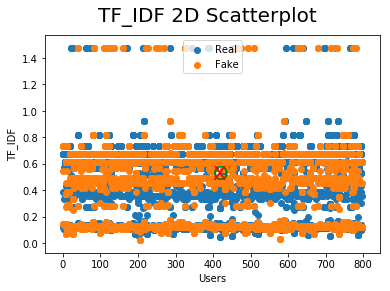

In [196]:
import matplotlib.pyplot as plt
import math

#MEAN
vec = []
nestVec = []
for user in fakeArticlesTFIDF:
    for word in fakeArticlesTFIDF[user]:
        nestVec.append(fakeArticlesTFIDF[user][word])
    vec.append(nestVec)
    nestVec=[]
vec = [item for sublist in vec for item in sublist]
fakeMean = np.mean(vec)

vec = []
nestVec = []
for user in realArticlesTFIDF:
    for word in realArticlesTFIDF[user]:
        nestVec.append(realArticlesTFIDF[user][word])
    vec.append(nestVec)
    nestVec=[]
vec = [item for sublist in vec for item in sublist]
realMean = np.mean(vec)

for key in fakeArticlesTFIDF:
    if key not in realArticlesTFIDF.keys():
        realArticlesTFIDF[key]={}
        realArticlesTFIDF[key]['null']=np.nan
for key in realArticlesTFIDF:
    if key not in fakeArticlesTFIDF.keys():
        fakeArticlesTFIDF[key]={}
        fakeArticlesTFIDF[key]['null']=np.nan
        
fig = plt.figure()
ax = fig.add_subplot(111)

x = []
y = []
x1=[]
y1=[]
xUnique=[]

keys = sorted(set(list(realArticlesTFIDF.keys())+list(fakeArticlesTFIDF.keys())))

#add values from set of real and fake to realUsersTotal if 77
d = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d[x] for x in realArticlesTFIDF.keys()]
for i,key in enumerate(temp):
        realArticlesTFIDF[key] = realArticlesTFIDF.pop(list(d)[i])
    
d2 = dict([(y,x+1) for x,y in enumerate(keys)])
temp = [d2[x] for x in fakeArticlesTFIDF.keys()]
for i,key in enumerate(temp):
    fakeArticlesTFIDF[key] = fakeArticlesTFIDF.pop(list(d2)[i])
    
    
for user in realArticlesTFIDF:
    xUnique.append(user)
    for word in realArticlesTFIDF[user]:
        x1.append(user)
        y1.append(realArticlesTFIDF[user][word])
    x.append(x1)
    y.append(y1)
    x1=[]
    y1=[]
x = [item for sublist in x for item in sublist]
y = [item for sublist in y for item in sublist]

lim = math.pow(5, 9)
xUnique = [i for i in xUnique if i <= lim]
#ax.set_xlim([0, 5000000000])
ax.scatter(x, y)
ax.text(np.mean(xUnique),realMean, 'O', size=20, color='g')

x = []
y = []
x1=[]
y1=[]
xUnique=[]
for user in fakeArticlesTFIDF:
    xUnique.append(user)
    for word in fakeArticlesTFIDF[user]:
        x1.append(user)
        y1.append(fakeArticlesTFIDF[user][word])
    x.append(x1)
    y.append(y1)
    x1=[]
    y1=[]
x = [item for sublist in x for item in sublist]
y = [item for sublist in y for item in sublist]

#ax.set_xlim([0, 5000000000])
ax.scatter(x, y)
ax.legend(('Real','Fake'))
ax.set_xlabel('Users')
ax.set_ylabel('TF_IDF')
fig.suptitle('TF_IDF 2D Scatterplot', fontsize=20)
lim = math.pow(5, 9)
xUnique = [i for i in xUnique if i <= lim]

#fjern elementer større enn 5e9 fra xUnique
ax.text(np.mean(xUnique),fakeMean, 'X', size=20, color='r')

print(fakeMean)
print(realMean)

## TF-IDF 3D Scatterplot

nan
nan


Text(389.48827070790946, 8.544322192235832, 'X')

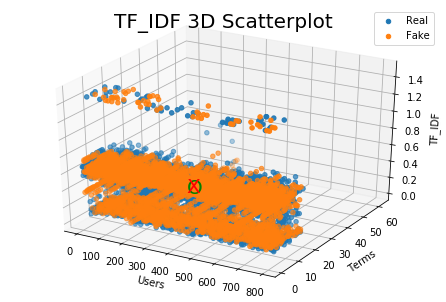

In [197]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import copy

realCp = dict(realArticlesTFIDF)
fakeCp = dict(fakeArticlesTFIDF)
realCp2 = {}
realCp2 = copy.deepcopy(realArticlesTFIDF)
#add values from set of real and fake to realUsersTotal if 77

keys = []
for user in realCp.keys():
    keys = sorted(set(list(realCp[user].keys())+list(fakeCp[user].keys())))
    d = dict([(y,x+1) for x,y in enumerate(keys)])
    temp = [d[x] for x in realCp[user].keys()]
    realKeys = [x for x in realCp[user].keys()]
    for i,term in enumerate(temp):
        realCp[user][term] = realCp[user].pop(realKeys[i])
keys = []       
        
for user in fakeCp.keys():
    keys = sorted(set(list(realCp2[user].keys())+list(fakeCp[user].keys())))
    d = dict([(y,x+1) for x,y in enumerate(keys)])
    temp2 = [d[x] for x in fakeCp[user].keys()]
    fakeKeys = [x for x in fakeCp[user].keys()]
    for i,term in enumerate(temp2):
        fakeCp[user][term] = fakeCp[user].pop(fakeKeys[i])
        
        
fig = plt.figure()
ax = Axes3D(fig)

x = []
y = []
z = []
x1=[]
y1=[]
z1=[]
xUnique=[]
for user in realCp:
    xUnique.append(hash(user))
    for word in realCp[user]:
        x1.append(user)
        y1.append(word)
        z1.append(realCp[user][word])
    x.append(x1)
    y.append(y1)
    z.append(z1)
    x1=[]
    y1=[]
    z1=[]
x = [item for sublist in x for item in sublist]
y = [item for sublist in y for item in sublist]
z = [item for sublist in z for item in sublist]

print(np.mean(z))

z=np.array(z)

ax.scatter(x, y, z, zorder=1)
ax.text(np.mean(x),np.mean(y),z[~np.isnan(z)].mean(), 'O', size=20, zorder=10, color='g')

x = []
y = []
z = []
x1=[]
y1=[]
z1=[]
xUnique=[]
for user in fakeCp:
    xUnique.append(user)
    for word in fakeCp[user]:
        x1.append(user)
        y1.append(word)
        z1.append(fakeCp[user][word])
    x.append(x1)
    y.append(y1)
    z.append(z1)
    x1=[]
    y1=[]
    z1=[]
x = [item for sublist in x for item in sublist]
y = [item for sublist in y for item in sublist]
z = [item for sublist in z for item in sublist]

ax.scatter(x, y, z, zorder=5)

ax.legend(('Real','Fake'))
ax.set_xlabel('Users')
ax.set_ylabel('Terms')
ax.set_zlabel('TF_IDF')
fig.suptitle('TF_IDF 3D Scatterplot', fontsize=20)


print(np.mean(z))
#fjern elementer større enn 5e9 fra xUnique
z = np.array(z)
ax.text(np.mean(x),np.mean(y),z[~np.isnan(z)].mean(), 'X', size=20, zorder=10, color='r')
#ax.text(np.mean(x),np.mean(y),np.mean(z),  'FAKE', size=20, zorder=10, color='k')
#ax.annotate('annotate', xy=(2, 1), xytext=(3, 4), arrowprops=dict(facecolor='black', shrink=0.05))

#label centers

In [133]:
print(type(keys))

<class 'list'>


## t-SNE 2D Scatter Plot (TF_IDF)

In [198]:
x = []
y = []
x1=[]
y1=[]
 
realCopy = dict(realArticlesTFIDF)
fakeCopy = dict(fakeArticlesTFIDF)

for user in realCopy:
    for word in realCopy[user]:
        x1.append(user)
        y1.append(realCopy[user][word])
    x.append(x1)
    y.append(y1)
    x1=[]
    y1=[]
x = [item for sublist in x for item in sublist]
y = [item for sublist in y for item in sublist]
y = [0 if math.isnan(x) else x for x in y]
combinedReal = np.vstack((x, y)).T
RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points = tsne.fit_transform(combinedReal[:10000])

x2 = []
y2 = []
x1=[]
y1=[]
for user in fakeCopy:
    for word in fakeCopy[user]:
        x1.append(user)
        y1.append(fakeCopy[user][word])
    x2.append(x1)
    y2.append(y1)
    x1=[]
    y1=[]
x2 = [item for sublist in x2 for item in sublist]
y2 = [item for sublist in y2 for item in sublist]
y2 = [0 if math.isnan(x) else x for x in y2]
combinedFake = np.vstack((x2, y2)).T
RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=RANDOM_STATE)
points2 = tsne.fit_transform(combinedFake[:10000])

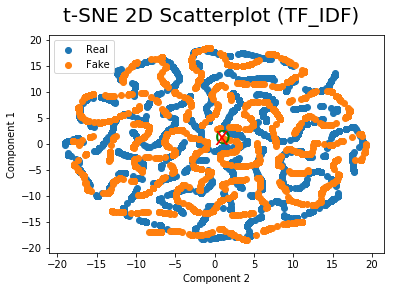

In [199]:
def plot_tsne_2d(x, y, x2, y2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x, y)
    ax.text(np.mean(x),np.mean(y), 'O', size=20, color='g')
    ax.scatter(x2, y2)
    ax.text(np.mean(x2),np.mean(y2), 'X', size=20, color='r')
    ax.legend(('Real','Fake'))
    ax.set_xlabel('Component 2')
    ax.set_ylabel('Component 1')
    fig.suptitle('t-SNE 2D Scatterplot (TF_IDF)', fontsize=20)
plot_tsne_2d(
    x = points[:10000, 0],
    y = points[:10000, 1],
    x2 = points2[:10000, 0],
    y2 = points2[:10000, 1])

## t_SNE 3D Scatterplot (TF_IDF)

In [200]:
x = []
y = []
z=[]
x1=[]
y1=[]
z1=[]
for user in realArticlesTFIDF:
    for word in realArticlesTFIDF[user]:
        x1.append(hash(user))
        y1.append(hash(word))
        z1.append(realArticlesTFIDF[user][word])
    x.append(x1)
    y.append(y1)
    z.append(z1)
    x1=[]
    y1=[]
    z1=[]
x = [item for sublist in x for item in sublist]
y = [item for sublist in y for item in sublist]
z = [item for sublist in z for item in sublist]
z = [0 if math.isnan(x) else x for x in z]
combinedReal = np.vstack((x, y, z)).T
RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_iter=300, random_state=RANDOM_STATE)
points = tsne.fit_transform(combinedReal[:10000])

x2 = []
y2 = []
z2 = []
x1=[]
y1=[]
z1=[]
for user in fakeArticlesTFIDF:
    for word in fakeArticlesTFIDF[user]:
        x1.append(hash(user))
        y1.append(hash(word))
        z1.append(fakeArticlesTFIDF[user][word])
    x2.append(x1)
    y2.append(y1)
    z2.append(z1)
    x1=[]
    y1=[]
    z1=[]
x2 = [item for sublist in x2 for item in sublist]
y2 = [item for sublist in y2 for item in sublist]
z2 = [item for sublist in z2 for item in sublist]
z2 = [0 if math.isnan(x) else x for x in z2]
combinedFake = np.vstack((x2, y2, z2)).T
RANDOM_STATE = 42
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_iter=300, random_state=RANDOM_STATE)
points2 = tsne.fit_transform(combinedFake[:10000])

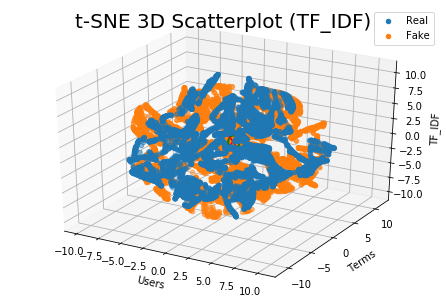

In [201]:
from mpl_toolkits.mplot3d import Axes3D
def plot_tsne_3d(x, y, z, x2, y2, z2):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z)
    ax.text(np.mean(x),np.mean(y), np.mean(z), 'O', size=20, color='g')
    ax.scatter(x2, y2, z2)
    ax.text(np.mean(x2),np.mean(y2), np.mean(z2), 'X', size=20, color='r')
    ax.legend(('Real','Fake'))
    ax.set_xlabel('Users')
    ax.set_ylabel('Terms')
    ax.set_zlabel('TF_IDF')
    fig.suptitle('t-SNE 3D Scatterplot (TF_IDF)', fontsize=20)
plot_tsne_3d(
    x = points[:10000, 0],
    y = points[:10000, 1],
    z = points[:10000, 2],
    x2 = points2[:10000, 0],
    y2 = points2[:10000, 1],
    z2 = points2[:10000, 2])